# Siamese Network + Haar Cascade Algorithm for Dogs Dataset.

Name: Anthony Kevin Oktavius

In this project, we built a siamese network with Haar Cascade Algorithm for determining the types of Dogs!

In [ ]:
import numpy as np
import pandas as pd
import zipfile
import cv2
import shutil
import zipfile
import os
import zipfile
import gc
import math
import warnings
import random
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import albumentations as A
import torchvision
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
import torch.utils.data as data_utils
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import PIL
import torch.utils.data as data_utils
import xml.etree.ElementTree as ET # Parse XML Data.

from PIL import Image
from torch.utils.data import Dataset
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python.client import device_lib
from zipfile import ZipFile
from IPython import display
from torchvision import models, transforms
from google.colab.patches import cv2_imshow
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.preprocessing import LabelEncoder

In [ ]:
print("Device Specifications:")
print(device_lib.list_local_devices())

Device Specifications:
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6642490057907370302
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 13890289664
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2558668878341441462
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


If the computer supports GPU, then use GPU. Otherwise, just use CPU.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## Data Preparation

### Data Training

In [ ]:
! wget https://github.com/GuillaumeMougeot/DogFaceNet/releases/download/dataset/DogFaceNet_Dataset_224_1.zip -O dog_face_net.zip
! unzip ./dog_face_net.zip

Streaming output truncated to the last 5000 lines.
  inflating: after_4_bis/326/326.3.jpg  
  inflating: after_4_bis/326/326.4.jpg  
  inflating: after_4_bis/326/326.5.jpg  
  inflating: after_4_bis/326/326.6.jpg  
  inflating: after_4_bis/326/326.7.jpg  
   creating: after_4_bis/327/
  inflating: after_4_bis/327/327.0.jpg  
  inflating: after_4_bis/327/327.1.jpg  
  inflating: after_4_bis/327/327.2.jpg  
  inflating: after_4_bis/327/327.3.jpg  
  inflating: after_4_bis/327/327.4.jpg  
  inflating: after_4_bis/327/327.5.jpg  
   creating: after_4_bis/328/
  inflating: after_4_bis/328/328.0.jpg  
  inflating: after_4_bis/328/328.1.jpg  
  inflating: after_4_bis/328/328.2.jpg  
  inflating: after_4_bis/328/328.3.jpg  
  inflating: after_4_bis/328/328.4.jpg  
  inflating: after_4_bis/328/328.5.jpg  
  inflating: after_4_bis/328/328.6.jpg  
   creating: after_4_bis/329/
  inflating: after_4_bis/329/329.0.jpg  
  inflating: after_4_bis/329/329.1.jpg  
  inflating: after_4_bis/329/329.2.jpg 

### Data Testing

Get Data from Kaggle.

In [ ]:
! cp ./drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/
! kaggle datasets download -d jessicali9530/stanford-dogs-dataset

 97% 729M/750M [00:03<00:00, 172MB/s]
100% 750M/750M [00:04<00:00, 194MB/s]


In [ ]:
content_directory = "/content/"
zip_path = content_directory + 'stanford-dogs-dataset.zip'
dataset_path = content_directory + 'datasets/'
annotations_directory = dataset_path + 'annotations/'
zip_file = zipfile.ZipFile(zip_path, 'r')
zip_file.extractall(dataset_path)
zip_file.close()

print("Images have been successfully extracted!")

Images have been successfully extracted!


In [ ]:
# Rename all folders, so all names consist of words only
def split_values(labels, split_char, start_split_index):
  list_labels = []
  for label in labels:
    temp_label = label.split(split_char)
    temp_sliced_labels = temp_label[:][start_split_index:]
    new_string = ""
    for temp_sliced_label in temp_sliced_labels:
      new_string += str(temp_sliced_label) + ' '
    list_labels.append(new_string)
  return list_labels

# Rename Annotations Path
annotations_directory_path = dataset_path + 'annotations/Annotation/'
all_annotations_directory_name = sorted(os.listdir(annotations_directory_path))
first_split_labels = split_values(all_annotations_directory_name, '-', 1)
second_split_labels = split_values(first_split_labels, '_', 0)
currentIndex = 0
for annotation_directory_name in all_annotations_directory_name:
  print("Renaming {} to {}".format(annotations_directory_path + annotation_directory_name, annotations_directory_path + second_split_labels[currentIndex]))
  os.rename(annotations_directory_path + annotation_directory_name, annotations_directory_path + second_split_labels[currentIndex])
  currentIndex += 1
print("All Annotations Directories' name have been fixed! Happy classifying!")

# Rename Image Directory Path
images_directory_path = dataset_path + 'images/Images/'
all_images_directory_name = sorted(os.listdir(images_directory_path))
first_split_labels = split_values(all_images_directory_name, '-', 1)
second_split_labels = split_values(first_split_labels, '_', 0)
currentIndex = 0
for image_directory_name in all_images_directory_name:
  print("Renaming {} to {}".format(images_directory_path + image_directory_name, images_directory_path + second_split_labels[currentIndex]))
  os.rename(images_directory_path + image_directory_name, images_directory_path + second_split_labels[currentIndex])
  currentIndex += 1
print("All Image Directories' name have been fixed! Happy classifying!")

Renaming /content/datasets/annotations/Annotation/n02085620-Chihuahua to /content/datasets/annotations/Annotation/Chihuahua  
Renaming /content/datasets/annotations/Annotation/n02085782-Japanese_spaniel to /content/datasets/annotations/Annotation/Japanese spaniel  
Renaming /content/datasets/annotations/Annotation/n02085936-Maltese_dog to /content/datasets/annotations/Annotation/Maltese dog  
Renaming /content/datasets/annotations/Annotation/n02086079-Pekinese to /content/datasets/annotations/Annotation/Pekinese  
Renaming /content/datasets/annotations/Annotation/n02086240-Shih-Tzu to /content/datasets/annotations/Annotation/Shih Tzu  
Renaming /content/datasets/annotations/Annotation/n02086646-Blenheim_spaniel to /content/datasets/annotations/Annotation/Blenheim spaniel  
Renaming /content/datasets/annotations/Annotation/n02086910-papillon to /content/datasets/annotations/Annotation/papillon  
Renaming /content/datasets/annotations/Annotation/n02087046-toy_terrier to /content/datasets

## Data Preprocessing

### Data Training and Validation

The dataset that will be fitted to our Siamese Network model. USE THIS FOR TRAINING

In [ ]:
image_train_transforms = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor(),
    # transforms.Normalize((0.5, ), (0.5, ))
    # transforms.Normalize(mean=[0.485, 0.456, 0.406],
    #                      std=[0.229, 0.224, 0.225])
])

image_val_test_transforms = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5, ), (0.5, )) 
    # transforms.Normalize(mean=[0.485, 0.456, 0.406],
    #                      std=[0.229, 0.224, 0.225])
])

Load Pytorch data, based on each folders.

In [ ]:
dogs_datasets = torchvision.datasets.ImageFolder(
  "./after_4_bis/",
)

Test the code function on the cell. Here's the detailed steps on how it works:

* Randomly Pick an anchor dataset.
* Get the class value.
* Filter the array, which contains the same class as the given anchor dataset

* For Positive Dataset: 
  * Randomly Pick a dataset, which resembles the positive dataset.
  
* For Negative Dataset: 
  * Randomly Pick a dataset, which resembles the negative dataset.

Why is this structured this way? It's because we'd like to make a triplet loss. See the figure here.

![Triplet Loss](https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs11760-019-01612-3/MediaObjects/11760_2019_1612_Fig1_HTML.png)


In [ ]:
# Print all of image paths and their classes.
print(dogs_datasets.imgs)

# DEFINE GLOBAL VARIABLES TO HELP UNDERSTANDING THE CODE
FILE_PATH = 0
CLASS_INDEX = 1

# For Anchor Datum
MIN_INDEX_DATA = 0
MAX_INDEX_DATA = len(dogs_datasets) - 1
anchor_datum_index = random.randint(MIN_INDEX_DATA, MAX_INDEX_DATA)
anchor_datum = dogs_datasets.imgs[anchor_datum_index]
anchor_class = anchor_datum[CLASS_INDEX]
print(anchor_class)

# For Positive Dataset
positive_data = list(filter(lambda x: x[CLASS_INDEX] == anchor_class, dogs_datasets.imgs))
print(f"Positive Data: {positive_data}")

while True:
  MIN_POSITIVE_INDEX_DATA = 0
  MAX_POSITIVE_INDEX_DATA = len(positive_data) - 1
  positive_datum_index = random.randint(MIN_POSITIVE_INDEX_DATA, MAX_POSITIVE_INDEX_DATA)
  positive_datum = positive_data[positive_datum_index]
  
  # If we accidentally pick the same dataset for both anchor and positive dataset...
  # Repeat the loop.
  # Otherwise, stop the loop
  if positive_datum[FILE_PATH] != anchor_datum[FILE_PATH]:
    break

# For Negative Dataset
negative_data = list(filter(lambda x: x[CLASS_INDEX] != anchor_class, dogs_datasets.imgs))
print(f"Negative Data: {negative_data}")

MIN_NEGATIVE_INDEX_DATA = 0
MAX_NEGATIVE_INDEX_DATA = len(negative_data) - 1
negative_datum_index = random.randint(MIN_NEGATIVE_INDEX_DATA, MAX_NEGATIVE_INDEX_DATA)
negative_datum = negative_data[negative_datum_index]

print()
print("SAMPLE RESULTS: ")
print(anchor_datum)
print(positive_datum)
print(negative_datum)

[('./after_4_bis/0/0.0.jpg', 0), ('./after_4_bis/0/0.1.jpg', 0), ('./after_4_bis/0/0.2.jpg', 0), ('./after_4_bis/0/0.3.jpg', 0), ('./after_4_bis/0/0.4.jpg', 0), ('./after_4_bis/1/1.0.jpg', 1), ('./after_4_bis/1/1.1.jpg', 1), ('./after_4_bis/1/1.2.jpg', 1), ('./after_4_bis/1/1.3.jpg', 1), ('./after_4_bis/1/1.4.jpg', 1), ('./after_4_bis/100/100.0.jpg', 2), ('./after_4_bis/100/100.1.jpg', 2), ('./after_4_bis/100/100.2.jpg', 2), ('./after_4_bis/100/100.3.jpg', 2), ('./after_4_bis/100/100.4.jpg', 2), ('./after_4_bis/100/100.5.jpg', 2), ('./after_4_bis/100/100.6.jpg', 2), ('./after_4_bis/100/100.7.jpg', 2), ('./after_4_bis/1000/1000.0.jpg', 3), ('./after_4_bis/1000/1000.1.jpg', 3), ('./after_4_bis/1000/1000.2.jpg', 3), ('./after_4_bis/1000/1000.3.jpg', 3), ('./after_4_bis/1000/1000.4.jpg', 3), ('./after_4_bis/1000/1000.5.jpg', 3), ('./after_4_bis/1001/1001.0.jpg', 4), ('./after_4_bis/1001/1001.1.jpg', 4), ('./after_4_bis/1001/1001.2.jpg', 4), ('./after_4_bis/1001/1001.3.jpg', 4), ('./after_4

Create a Data Class

In [ ]:
class DogSiameseNetworkDataset(Dataset):
  def __init__(self, image_folder_dataset, transform=None):
    self.image_folder_dataset = image_folder_dataset
    self.transform = transform
      
  def __getitem__(self, index):
    # DEFINE GLOBAL VARIABLES TO HELP UNDERSTANDING THE CODE
    FILE_PATH = 0
    CLASS_INDEX = 1

    # For Anchor Datum
    MIN_INDEX_DATA = 0
    MAX_INDEX_DATA = len(dogs_datasets) - 1
    anchor_datum_index = random.randint(MIN_INDEX_DATA, MAX_INDEX_DATA)
    anchor_datum = dogs_datasets.imgs[anchor_datum_index]
    anchor_class = anchor_datum[CLASS_INDEX]

    # For Positive Dataset
    positive_data = list(filter(lambda x: x[CLASS_INDEX] == anchor_class, dogs_datasets.imgs))

    while True:
      MIN_POSITIVE_INDEX_DATA = 0
      MAX_POSITIVE_INDEX_DATA = len(positive_data) - 1
      positive_datum_index = random.randint(MIN_POSITIVE_INDEX_DATA, MAX_POSITIVE_INDEX_DATA)
      positive_datum = positive_data[positive_datum_index]
      
      # If we accidentally pick the same dataset for both anchor and positive dataset...
      # Repeat the loop.
      # Otherwise, stop the loop
      if positive_datum[FILE_PATH] != anchor_datum[FILE_PATH]:
        break

    # For Negative Dataset
    negative_data = list(filter(lambda x: x[CLASS_INDEX] != anchor_class, dogs_datasets.imgs))

    MIN_NEGATIVE_INDEX_DATA = 0
    MAX_NEGATIVE_INDEX_DATA = len(negative_data) - 1
    negative_datum_index = random.randint(MIN_NEGATIVE_INDEX_DATA, MAX_NEGATIVE_INDEX_DATA)
    negative_datum = negative_data[negative_datum_index]

    # Preview the image using PIL. We convert the image first to grayscale!
    anchor_image = Image.open(anchor_datum[FILE_PATH])#.convert("L")
    positive_image = Image.open(positive_datum[FILE_PATH])#.convert("L")
    negative_image = Image.open(negative_datum[FILE_PATH])#.convert("L")

    if self.transform is not None:
      anchor_image = self.transform(anchor_image)
      positive_image = self.transform(positive_image)
      negative_image = self.transform(negative_image)

    return anchor_image, positive_image, negative_image
      
  def __len__(self):
    return len(self.image_folder_dataset)

dog_siamese_network_dataset = DogSiameseNetworkDataset(
  dogs_datasets,
  transform = image_train_transforms,
)

# Test the function.
sample_dataset = next(iter(dog_siamese_network_dataset))
# Test anchor, positive and negative dataset.
print(sample_dataset[0].shape)
print(sample_dataset[1].shape)
print(sample_dataset[2].shape)

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


Split into train and test split.

Perform Random Splitting on Image Dataset.

In [ ]:
# number_of_datasets = len(dog_siamese_network_dataset)
# num_train = int(0.8 * number_of_datasets)
# num_test = number_of_datasets - num_train

# print(f"Number of train sets: {num_train}")
# print(f"Number of test sets: {num_test}")

# dog_faces_train_subset, dog_faces_val_subset = torch.utils.data.random_split(dogs_train_datasets, [num_train, num_test])
# print(len(dog_faces_train_subset))
# print(len(dog_faces_val_subset))

Convert into Data Loader

In [ ]:
dog_train_loader = torch.utils.data.DataLoader(
    dog_siamese_network_dataset,
    batch_size = 8,
)

Visualize Some Images after transformation.

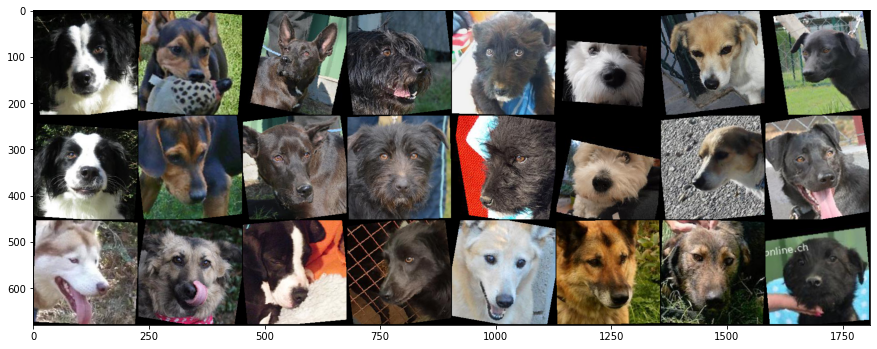

In [ ]:
def plot_images_in_grid(title, images, labels, figsize = (15, 15), MIN_INDEX_PLOT = 0, MAX_INDEX_PLOT = 20):
  plt.figure(figsize = figsize)
  plt.suptitle(title)
  for index in range(MIN_INDEX_PLOT, MAX_INDEX_PLOT):
    plt.subplot(5, 5, index + 1)
    plt.axis('off')
    plt.text(x = 10, y = 0.5, s = labels[index], fontsize = 10, bbox = dict(facecolor = 'white'))
    plt.imshow(images[index], cmap = 'gray')

def visualize_pytorch_grid(images_in_batch):
  plt.figure(figsize = (15, 15))
  grid_images_in_batch = torchvision.utils.make_grid(images_in_batch)
  plt_compatible_grid_images_in_batch = np.transpose(grid_images_in_batch.numpy(), (1, 2, 0))
  plt.imshow(plt_compatible_grid_images_in_batch)

def visualize_dataloader(data_loader, title):
  iter_loader = iter(data_loader)
  sample_batch_anchor_image,  sample_anchor_positive_image, sample_anchor_negative_image = next(iter_loader)

  sample_image_batch = torch.cat(
      [sample_batch_anchor_image,  sample_anchor_positive_image, sample_anchor_negative_image], 
      0,
  )

  visualize_pytorch_grid(sample_image_batch)

MIN_INDEX_PLOT = 1
MAX_INDEX_PLOT = 20

visualize_dataloader(dog_train_loader, "Dogs Transformed Image")

### Data Testing

The dataset that will not be fitted on. This will be used for testing our siamese network. DON'T USE THIS FOR TRAINING THE MODEL.

Copy the Dataset Folders (but not the contents), so we can save the dataset into a specific folder.

In [ ]:
! find "./datasets/images/Images" -type d -links 2 -exec mkdir -p "./drive/MyDrive/Dogs_Dataset/{}" \;

find: ‘./datasets/images/Images’: No such file or directory


Since we don't use object detection and our focus is just only siamese network, we just instantly crop images from the given annotation, that gives the bounding box coordinate for the dogs image.

We use the library called XML Tree.

In [ ]:
image_dataset_path = "datasets/images/Images"
new_face_dataset_path = "drive/MyDrive/Dogs_Dataset/datasets/images/Images"
annotation_path = "datasets/annotations/Annotation"
haarcascade_path = "./dog_face_haar_cascade-master/cascade.xml"

def get_bounding_box_from_annotation(annotation_path):
  tree = ET.parse(annotation_path)
  root = tree.getroot()
  size_tree = root.find("size")
  object_all_tree = root.findall("object")

  # Find the width and height of an image
  # NOTE: THIS VARIABLES ARE NOT USED YET, SO IT DOESN'T HAVE TO BE RETURNED.
  width_bbox = size_tree.find("width")
  height_bbox = size_tree.find("height")

  # Format: x, y, width, height.
  bounding_box_informations = []

  # Get bounding box coordinate information. Also, sometimes, there are
  # multiple bounding box in one image, so we can use for looping.
  for object_tree in object_all_tree:

    # Get classes for the image
    object_class = object_tree.find("name")
  
    for bounding_box in object_tree.iter("bndbox"):
      x_min = int(bounding_box.find("xmin").text)
      x_max = int(bounding_box.find("xmax").text)
      y_min = int(bounding_box.find("ymin").text)
      y_max = int(bounding_box.find("ymax").text)

    bounding_box = (x_min, x_max, y_min, y_max, object_class)
    bounding_box_informations.append(bounding_box)

  return bounding_box_informations

def crop_image(image, location):
  x, y, width, height = location
  cropped_image = image[y:y+height, x:x+width]
  return cropped_image

def simple_crop_image(image, min_max_coordinates):
  x_min, x_max, y_min, y_max = min_max_coordinates
  cropped_image = image[y_min:y_max, x_min:x_max]
  return cropped_image

def save_opencv_image(image, save_path):
  if not cv2.imwrite(save_path, image):
     raise Exception("Could not write image")

dog_classes_dir = os.listdir(image_dataset_path)
for dog_class in dog_classes_dir:
  image_names_path = f"{image_dataset_path}/{dog_class}"
  image_names = os.listdir(image_names_path)
  print("================================================")
  print(f"Current Class: {dog_class}")
  print("================================================")
  for image_name in image_names:
    image_name = image_name.split(".")[0]
    full_image_path = f"{image_names_path}/{image_name}.jpg"
    full_save_image_path = f"{new_face_dataset_path}/{dog_class}/{image_name}.jpg"
    full_annotation_path = f"{annotation_path}/{dog_class}/{image_name}"

    dog_image = cv2.imread(full_image_path)
    dog_face_locations = get_bounding_box_from_annotation(full_annotation_path)

    for x_min, x_max, y_min, y_max, _ in dog_face_locations:
      dog_face_location = x_min, x_max, y_min, y_max
      cropped_dog_image = simple_crop_image(dog_image, dog_face_location)
      save_opencv_image(cropped_dog_image, full_save_image_path)

print("All Done!")

FileNotFoundError: ignored

## Data Modelling

Create a Siamese Network Model.

In [ ]:
class SiameseNetwork(nn.Module):
  def __init__(self):
    super(SiameseNetwork, self).__init__()
    # Original Input size: (3, 224, 224)

    # We calculate this formula for padding.
    # NOTES: Filter_size = kernel_size
    # In this case, we use same padding, the formula is: 
    # [(filter_size  - 1) / 2] ( Same Padding --> input size = output size).

    # Formula of feature map size:
    # [(input_size - filter_size + 2(padding) / stride) + 1]
    
    # 1st CNN layer: 
    # Same Padding = [(5 - 1) / 2] = 2
    # Feature Map size = (224 - 5 + 2(2)) + 1 = 224
    self.cnn1 = nn.Sequential(
      nn.Conv2d(3, 16, kernel_size = (5, 5), padding = 2),
      nn.MaxPool2d(2,2),
      nn.ReLU(),
      nn.BatchNorm2d(16),
    )

    # 2nd CNN layer:
    # 112
    self.cnn2 = nn.Sequential(
      nn.Conv2d(16, 32, kernel_size = (5, 5), padding = 2),
      nn.MaxPool2d(2,2),
      nn.ReLU(),
      nn.BatchNorm2d(32),
    )

    # 3rd CNN layer: 
    # 56
    self.cnn3 = nn.Sequential(
      nn.Conv2d(32, 64, kernel_size = (5, 5), padding = 2),
      nn.MaxPool2d(2,2),
      nn.ReLU(),
      nn.BatchNorm2d(64),
    )

    # 4th CNN layer:
    # 28 
    self.cnn4 = nn.Sequential(
      nn.Conv2d(64, 128, kernel_size = (5, 5), padding = 2),
      nn.MaxPool2d(2,2),
      nn.ReLU(),
      nn.BatchNorm2d(128),
    )

    # 5th CNN layer: 
    # 14
    self.cnn5 = nn.Sequential(
      nn.Conv2d(128, 256, kernel_size = (5, 5), padding = 2),
      nn.MaxPool2d(2,2),
      nn.ReLU(),
      nn.BatchNorm2d(256),
    )

    # Fully connected layers.
    self.fc1 = nn.Sequential(
      nn.Flatten(),
      nn.Linear(256*7*7, 1024),
      nn.ReLU(inplace=True),

      nn.Linear(1024, 512),
      nn.ReLU(inplace=True),

      nn.Linear(512, 256),
      nn.ReLU(inplace=True),

      nn.Linear(256, 5)
    )

  def forward_once(self, x):
    output = self.cnn1(x)
    output = self.cnn2(output)
    output = self.cnn3(output)
    output = self.cnn4(output)
    output = self.cnn5(output)
    # output = output.view(output.size()[0], -1)
    output = self.fc1(output)
    return output

  def forward(self, input1, input2, input3):
    # Create 2 siamese networks and perform forward propagation.
    output1 = self.forward_once(input1)
    output2 = self.forward_once(input2)
    output3 = self.forward_once(input3)
    return output1, output2, output3

print(SiameseNetwork())

SiameseNetwork(
  (cnn1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (cnn2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (cnn3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (cnn4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2

Test Feedforward the model.

In [ ]:
def flatten_layers_from_model(model, START_FROM_INDEX = 1):
  # Get all the model layers, except Sequential Layers, 
  # since we'd like to iterate the layers one by one.
  model_layers = list(model.modules())[START_FROM_INDEX:]
  flattened_model_layers = []

  for index, layer in enumerate(model_layers):
    # Filter layers, as we don't want to process sequential layers.
    if type(layer) != torch.nn.modules.container.Sequential:
      flattened_model_layers.append(layer)

  return flattened_model_layers

def inspect_model(model):

  print("==========================================================")
  print("Layer Names:")
  non_sequential_layers =  flatten_layers_from_model(model)
  for index, layer in enumerate(non_sequential_layers):
    print(f"{index}: {layer}")
  print("==========================================================")

  print("==========================================================")
  print("Model Weights: ")
  model_weights = model.state_dict()
  layer_names = model_weights.keys()
  for layer_name in layer_names:
    print(f"{layer_name}: {model_weights[layer_name].shape}")
  print("==========================================================")
  
inspect_model(SiameseNetwork())

Layer Names:
0: Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
1: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
2: ReLU()
3: BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
4: Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
5: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
6: ReLU()
7: BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
8: Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
9: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
10: ReLU()
11: BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
12: Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
13: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
14: ReLU()
15: BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
16: Conv2d(128, 256,

In [ ]:
def forward_propagate_layers(sample_datum, flattened_model_layers, device):
  all_layers_output = []
  with torch.no_grad():
    output = sample_datum
    for layer in flattened_model_layers:
      output = output.to(device)
      output = layer(output)
      all_layers_output.append(output)
      print(f"Layer: {layer}, with output size: {output.shape}")
  return all_layers_output

def make_one_sample_data(tensor_dataset, data_index):
  sample_datum = tensor_dataset[data_index][0]
  print(f"Your previous sample data: {sample_datum.shape}")
  sample_datum = sample_datum.unsqueeze(0)
  print(f"Your current sample data: {sample_datum.shape}")
  return sample_datum

sample_datum = make_one_sample_data(dog_siamese_network_dataset, 0)
print(sample_datum.shape)
siamese_network_layers = flatten_layers_from_model(SiameseNetwork().to(device))
siamese_network_all_layer_outputs = forward_propagate_layers(
    sample_datum, 
    siamese_network_layers, 
    device
)



Your previous sample data: torch.Size([3, 224, 224])
Your current sample data: torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
Layer: Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)), with output size: torch.Size([1, 16, 224, 224])
Layer: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), with output size: torch.Size([1, 16, 112, 112])
Layer: ReLU(), with output size: torch.Size([1, 16, 112, 112])
Layer: BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), with output size: torch.Size([1, 16, 112, 112])
Layer: Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)), with output size: torch.Size([1, 32, 112, 112])
Layer: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), with output size: torch.Size([1, 32, 56, 56])
Layer: ReLU(), with output size: torch.Size([1, 32, 56, 56])
Layer: BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), with output 

Define Network Properties

In [ ]:
siamese_network = SiameseNetwork().to(device)
triplet_loss = torch.nn.TripletMarginLoss()
optimizer = optim.Adam(siamese_network.parameters(), lr = 0.00001)

In [ ]:
epochs = 10
loss_history = []
iterations = []
total_iterations = 0

for epoch in range(0, epochs):
  total_loss = 0
  for index, data in enumerate(dog_train_loader):
    anchor_image, positive_image, negative_image = data
    anchor_image = anchor_image.to(device)
    positive_image = positive_image.to(device)
    negative_image = negative_image.to(device)

    optimizer.zero_grad()

    anchor_output, positive_output, negative_output = siamese_network(
        anchor_image, positive_image, negative_image
    )
    loss = triplet_loss(anchor_output, positive_output, negative_output)
    total_loss += loss.item()
    loss.backward()
    optimizer.step()

    if index % 10 == 0:
      print(f"Current Epoch: {epoch}, iteration = {total_iterations}, with current loss: {loss.item()}")
      loss_history.append(loss.item())
      iterations.append(total_iterations)

    total_iterations += 1

Current Epoch: 0, iteration = 0, with current loss: 1.0135893821716309
Current Epoch: 0, iteration = 10, with current loss: 1.0187745094299316
Current Epoch: 0, iteration = 20, with current loss: 0.9750714302062988
Current Epoch: 0, iteration = 30, with current loss: 0.9593687057495117
Current Epoch: 0, iteration = 40, with current loss: 0.9139351844787598
Current Epoch: 0, iteration = 50, with current loss: 0.9906290769577026
Current Epoch: 0, iteration = 60, with current loss: 1.028097152709961
Current Epoch: 0, iteration = 70, with current loss: 0.8945358395576477
Current Epoch: 0, iteration = 80, with current loss: 0.8522267937660217
Current Epoch: 0, iteration = 90, with current loss: 0.8582016229629517
Current Epoch: 0, iteration = 100, with current loss: 0.9567855596542358
Current Epoch: 0, iteration = 110, with current loss: 0.7286801934242249
Current Epoch: 0, iteration = 120, with current loss: 0.7764706015586853
Current Epoch: 0, iteration = 130, with current loss: 0.3146324

KeyboardInterrupt: ignored

Save the model, so we don't have to train the model again.

In [ ]:
def save_model(model, optimizer, filename = "model.pth.tar"):
  print("Saving model...")
  checkpoint = {
      "model_state_dict": model.state_dict(),
      "optimizer_state_dict": optimizer.state_dict()
  }
  torch.save(checkpoint, filename)
  print("Finished saving model!")

directory_path = "./drive/MyDrive/Models"
save_model(siamese_network, optimizer, filename = f"{directory_path}/siamese_network.pth.tar")

Saving model...
Finished saving model!


Load the saved model.

In [ ]:
def load_model(model, optimizer, filename = "model.pth.tar"):
  print("Loading model...")
  checkpoint = torch.load(filename)
  model.load_state_dict(checkpoint['model_state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
  print("Finished loading model!")

  return model, optimizer

directory_path = "./drive/MyDrive/Models"
siamese_network = SiameseNetwork()
siamese_network, adam_optimizer = load_model(siamese_network, optimizer, f"{directory_path}/siamese_network.pth.tar")

Loading model...
Finished loading model!


## Data Evaluation

Let's test it with samples from training dataset, to see the eucledian distance values.